In [5]:
# ugly work-around on kernel dying with xgboost and matplotlib
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Otto, tune number of threads
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from time import time
from matplotlib import pyplot as plt

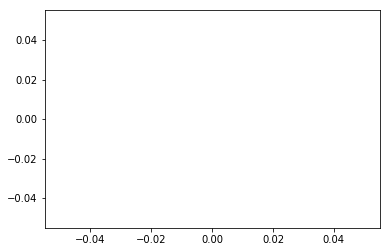

In [6]:
%matplotlib inline
plt.plot()
plt.show()

In [7]:
# load data
data = read_csv('train.csv')
dataset = data.values
# split data into X and y
X = dataset[:,0:94]
y = dataset[:,94]

In [8]:
# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(y)
# evaluate the effect of the number of threads
results = []
num_threads = [1, 2, 3, 4]
for n in num_threads:
    start = time()
    model = XGBClassifier(nthread=n)
    model.fit(X, label_encoded_y)
    elapsed = time() - start
    print(n, elapsed)
    results.append(elapsed)

1 67.69062185287476
2 35.55148983001709
3 25.436185121536255
4 20.570915699005127


In [9]:
results

[67.69062185287476, 35.55148983001709, 25.436185121536255, 20.570915699005127]

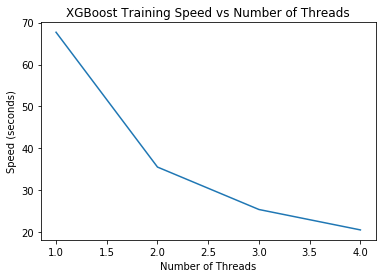

In [10]:
%matplotlib inline
# plot results
plt.plot(num_threads, results)
plt.ylabel('Speed (seconds)')
plt.xlabel('Number of Threads')
plt.title('XGBoost Training Speed vs Number of Threads')
plt.show()